Observations:

1. For mouse "s185" tested with Capomulin, as timepoint increased, tumor volume decreased.
2. Data was unbiased in choosing the gender of the mice, as piechart shows that there are almost equal amount of each.
3. According to the linear regression and correlation factor, it appears that there is a significant positive correlation between mouse weight and average tumor volume for Capomulin.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
 # Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse = duplicate["Mouse ID"].values[0]
print(duplicate_mouse)
duplicate

g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != duplicate_mouse]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
 # Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistic_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
mean = statistic_df.groupby(["Drug Regimen"]).mean()
median = statistic_df.groupby(["Drug Regimen"]).median()
variance = statistic_df.groupby(["Drug Regimen"]).var()
SD = statistic_df.groupby(["Drug Regimen"]).std()
SEM = statistic_df.groupby(["Drug Regimen"]).sem()
one = pd.merge(mean, median, on="Drug Regimen")
one= one.rename(columns={"Tumor Volume (mm3)_x": "mean", "Tumor Volume (mm3)_y": "median"})
two = pd.merge(one, variance, on="Drug Regimen")
three = pd.merge(two, SD, on="Drug Regimen")
three = three.rename(columns={"Tumor Volume (mm3)_x": "variance", "Tumor Volume (mm3)_y": "standard deviation"})
summary_df = pd.merge(three, SEM, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)": "SEM"})
summary_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary2_df = statistic_df.groupby(["Drug Regimen"]).agg([np.mean, np.median, np.var, np.std, st.sem])
summary2_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

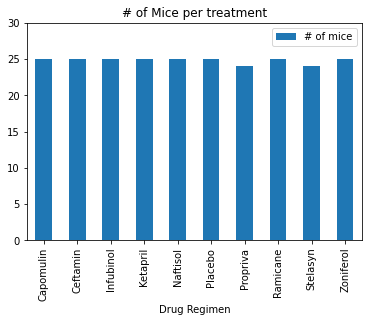

In [34]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
data = clean_df[["Drug Regimen", "Mouse ID"]].groupby(["Drug Regimen", "Mouse ID"]).count()
data = data.reset_index()
data_df = data.groupby(["Drug Regimen"]).count()
data_df
data_renamed = data_df.rename(columns={"Mouse ID": "# of mice"})
graph = pd.DataFrame(data_renamed["# of mice"])
graph.plot.bar(ylim=(0, 30), title="# of Mice per treatment")





                

(0.0, 30.0)

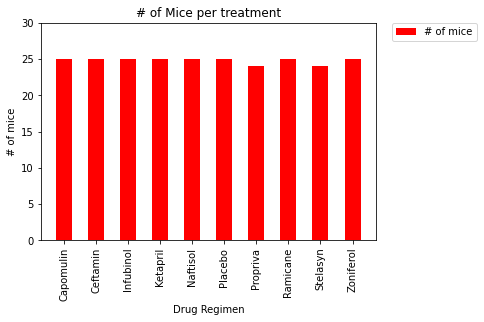

In [31]:
 # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drugs = data_df.index.tolist()
mouse = data_df["Mouse ID"].tolist()

plt.bar(drugs, mouse, color='r', alpha=1, align="center", width=0.50, label="# of mice")
plt.xticks(rotation='vertical')
plt.title("# of Mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of mice")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,30])
    

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4eb810d68>],
      dtype=object)

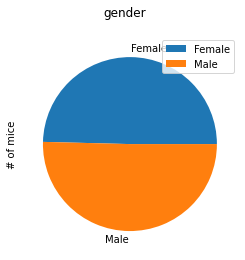

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df[["Mouse ID", "Sex"]].groupby(["Mouse ID"]).first()
gender_final = gender.reset_index()
gender_df = gender_final.groupby(["Sex"]).count()
gender_df = gender_df.rename(columns={"Mouse ID": "# of mice"})
gender_df.plot.pie(subplots=True, title="gender")


Text(0, 0.5, '# of mice')

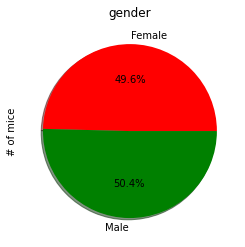

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

number = gender_final.groupby(["Sex"]).count()
number_series = number["Mouse ID"]
gender_series = number.index.tolist()
colors = ["red", "green"]

plt.pie(number_series, labels=gender_series, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.title("gender")
plt.ylabel("# of mice")



In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse

# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Capomulin_sorted = Capomulin.sort_values(by='Timepoint', ascending=False)
Capomulin_df = Capomulin_sorted.groupby(["Mouse ID"]).first()
Capomulin_df = Capomulin_df.drop(columns="Drug Regimen")
Capomulin_df = Capomulin_df.rename(columns={"Tumor Volume (mm3)": "Capomulin"})
Capomulin_df = pd.DataFrame(Capomulin_df["Capomulin"])
Capomulin_df = Capomulin_df.reset_index()


Ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
Ramicane_sorted = Ramicane.sort_values(by='Timepoint', ascending=False)
Ramicane_df = Ramicane_sorted.groupby(["Mouse ID"]).first()
Ramicane_df = Ramicane_df.drop(columns="Drug Regimen")
Ramicane_df = Ramicane_df.rename(columns={"Tumor Volume (mm3)": "Ramicane"})
Ramicane_df = pd.DataFrame(Ramicane_df["Ramicane"])
Ramicane_df = Ramicane_df.reset_index()

Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
Infubinol_sorted = Infubinol.sort_values(by='Timepoint', ascending=False)
Infubinol_df = Infubinol_sorted.groupby(["Mouse ID"]).first()
Infubinol_df = Infubinol_df.drop(columns="Drug Regimen")
Infubinol_df = Infubinol_df.rename(columns={"Tumor Volume (mm3)": "Infubinol"})
Infubinol_df = pd.DataFrame(Infubinol_df["Infubinol"])
Infubinol_df = Infubinol_df.reset_index()


Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
Ceftamin_sorted = Ceftamin.sort_values(by='Timepoint', ascending=False)
Ceftamin_df = Ceftamin_sorted.groupby(["Mouse ID"]).first()
Ceftamin_df = Ceftamin_df.drop(columns="Drug Regimen")
Ceftamin_df = Ceftamin_df.rename(columns={"Tumor Volume (mm3)": "Ceftamin"})
Ceftamin_df = pd.DataFrame(Ceftamin_df["Ceftamin"])
Ceftamin_df = Ceftamin_df.reset_index()


,Mouse ID,Infubinol
0,a203,67.973419
1,a251,65.525743
2,a577,57.031862
3,a685,66.083066
4,c139,72.226731
5,c326,36.321346
6,c895,60.969711
7,e476,62.435404
8,f345,60.918767
9,i386,67.289621


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol has one potent

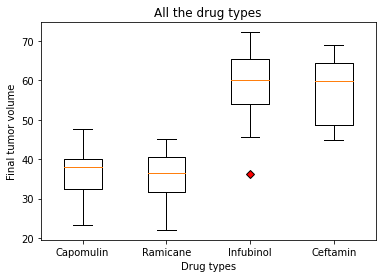

In [51]:
cap = Capomulin_df['Capomulin']
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The median of Capomulin is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-----------------------------------------------")

ram = Ramicane_df['Ramicane']
quartiles = ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The median of Ramicane is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-----------------------------------------------")

inf = Infubinol_df['Infubinol']
quartiles = inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The median of Infubinol is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier = Infubinol_df.loc[Infubinol_df["Infubinol"] < lower_bound]
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("Infubinol has one potential outlier listed below:")
print(outlier)
print("-----------------------------------------------")

cef = Ceftamin_df['Ceftamin']
quartiles = cef.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The median of Ceftamin is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


drugs_plot = [cap, ram, inf, cef]
fig1, ax1 = plt.subplots()
ax1.set_title('All the drug types')
ax1.set_ylabel('Final tumor volume')
ax1.set_xlabel('Drug types')
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(drugs_plot, flierprops=red_diamond)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()



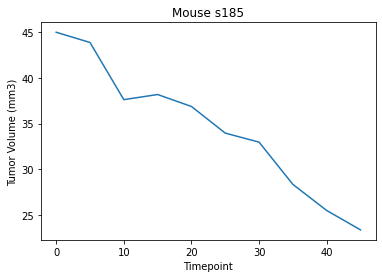

In [77]:
one_mouse = Capomulin.loc[Capomulin["Mouse ID"] == "s185"]
x_axis = one_mouse["Timepoint"]
y_axis = one_mouse["Tumor Volume (mm3)"]

plt.title("Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)


The correlation between both factors is 0.84


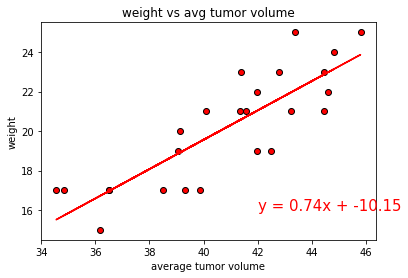

In [109]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mean_df = Capomulin.groupby(["Mouse ID"]).mean()
weight = mean_df["Weight (g)"]
average_tumor = mean_df["Tumor Volume (mm3)"]

plt.title("weight vs avg tumor volume")
plt.xlabel("average tumor volume")
plt.ylabel("weight")
plt.scatter(average_tumor, weight, marker="o", facecolors="red", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor, weight)
regress_values = average_tumor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(average_tumor,regress_values,"r-")
plt.annotate(line_eq,(42,16),fontsize=15,color="red")

correlation = st.pearsonr(average_tumor, weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")